<a href="https://colab.research.google.com/github/erick-paiva/EaselJS/blob/master/C%C3%B3pia_de_Desafio_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecommerce brasileiro



Importação das bibliotecas

In [2]:
#Extração
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Importação dos dados

In [ ]:
# Caminho base
base_path = '/content/drive/MyDrive/bd/'

# leitura dos dados-Arquivos
clientes = pd.read_csv(base_path + 'clientes.csv')
geolocalizacao = pd.read_csv(base_path + 'geolocalização.csv')
pagamentos = pd.read_csv(base_path + "pag_de_pedidos.csv")
pedidos = pd.read_csv(base_path + 'pedidos.csv')
itens = pd.read_csv(base_path + 'order_items.csv')  # Esse ainda está em inglês na imagem, então mantido assim
avaliacoes = pd.read_csv(base_path + 'analise.csv')
categorias = pd.read_csv(base_path + "produto_categoria_traducao.csv")
produtos = pd.read_csv(base_path + 'produtos.csv')
vendedores = pd.read_csv(base_path + 'vendedor.csv')


In [ ]:
display(pedidos)

## Extração, transformação e carregamento

### **TRADUÇAO DAS COLUNAS**

In [ ]:
#informação dos clientes
cliente = clientes.rename(columns=lambda col: col
                           .replace('customer_id', 'id_cliente')
                           .replace('customer_unique_id', 'id_unico_cliente')
                           .replace('customer_zip_code_prefix', 'cep_cliente')
                           .replace('customer_city', 'cidade_cliente')
                           .replace('customer_state', 'estado_cliente'))

In [1]:
#localizaçao das cidades
geolocalizacao = geolocalizacao.rename(columns=lambda col: col
                                       .replace('geolocation_zip_code_prefix', 'cep')
                                       .replace('geolocation_lat', 'latitude_geolocalizacao')
                                       .replace('geolocation_lng', 'longitude_geolocalizacao')
                                       .replace('geolocation_city', 'cidade_geolocalizacao')
                                       .replace('geolocation_state', 'estado_geolocalizacao'))

NameError: name 'geolocalizacao' is not defined

In [ ]:
#pagamentos dos pedidos
pagamento = pagamentos.rename(columns=lambda col: col
                               .replace('order_id', 'id_pedido')
                               .replace('payment_sequential', 'sequencia_pagamento')
                               .replace('payment_type', 'tipo_pagamento')
                               .replace('payment_installments', 'parcelas_pagamento')
                               .replace('payment_value', 'valor_pagamento'))

In [ ]:
#percusso do pedido
pedido = pedidos.rename(columns={'customer_id': 'id_cliente',
                                 'order_id': 'id_pedido',
                                 'order_status': 'status_pedido',
                                 'order_purchase_timestamp': 'data_compra',
                                 'order_approved_at': 'data_aprovacao',
                                 'order_delivered_carrier_date': 'data_entrega_transportadora',
                                 'order_delivered_customer_date': 'data_entrega_cliente',
                                 'order_estimated_delivery_date': 'data_entrega_estimada'})

In [ ]:
#informaçoes dos pedidos
itens = itens.rename(columns=lambda col: col
                     .replace('order_id', 'id_pedido')
                     .replace('product_id', 'id_produto')
                     .replace('seller_id', 'id_vendedor')
                     .replace('shipping_limit_date', 'data_limite_entrega')
                     .replace('price', 'preco')
                     .replace('freight_value', 'valor_frete'))

In [ ]:
#feedbacks clientes
avaliacoes = avaliacoes.rename(columns=lambda col: col
                               .replace('order_id', 'id_pedido')
                               .replace('review_score', 'nota_avaliacao')
                               .replace('review_comment_title', 'titulo_avaliacao')
                               .replace('review_comment_ message', 'mensagem_avaliacao')
                               .replace('review_creation_date', 'data_criacao_avaliacao')
                               .replace('review_answer_timestamp', 'data_resposta_avaliacao'))

In [ ]:
#traduçao categoria
trad_categ = categorias.rename(columns=lambda col: col
                               .replace('product_category_name', 'nome_categoria')
                               .replace('product_category_name_english', 'nome_categoria_ingles'))

In [ ]:
#tipo do produto
produtos = produtos.rename(columns=lambda col: col
                           .replace('product_id', 'id_produto')
                           .replace('product_category_name', 'nome_categoria')
                           .replace('product_name_lenght', 'comprimento_nome')
                           .replace('product_description_lenght', 'comprimento_descricao')
                           .replace('product_photos_qty', 'quantidade_fotos')
                           .replace('product_weight_g', 'peso_produto')
                           .replace('product_length_cm', 'comprimento_produto')
                           .replace('product_height_cm', 'altura_produto'))

In [ ]:
#pessoa ou loja vendido
vendedores = vendedores.rename(columns=lambda col: col
                               .replace('seller_id', 'id_vendedor')
                               .replace('seller_zip_code_prefix', 'cep_vendedor')
                               .replace('seller_city', 'cidade_vendedor')
                               .replace('seller_state', 'estado_vendedor'))

eliminição de valores nulos

In [ ]:
clientes = clientes.dropna()
geolocalizacao = geolocalizacao.dropna()
pagamentos = pagamentos.dropna()
pedidos = pedidos.dropna()
itens = itens.dropna()
avaliacoes = avaliacoes.dropna()
categorias = categorias.dropna()
produtos = produtos.dropna()
vendedores = vendedores.dropna()

In [ ]:
#se há valores nulos nas colunas
itens.isnull().sum()

,0
id_pedido,0
order_item_id,0
id_produto,0
id_vendedor,0
data_limite_entrega,0
preco,0
valor_frete,0


In [ ]:
pedidos.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

## 1. Análise de Performance de Vendas

Análise de Sazonalidade: Investigar padrões de sazonalidade nas vendas,
identificando os períodos do ano com maior volume de vendas.

In [ ]:
#selecionar as colunas
venda_data = pedidos[['order_purchase_timestamp', 'order_id']].rename(columns={'order_purchase_timestamp': 'data_compra'})

In [ ]:
#transformar tipo data e separarçao de ano, mes, dia e hora
venda_data['data_compra'] = pd.to_datetime(venda_data['data_compra'])
venda_data['ano'] = venda_data['data_compra'].dt.year
venda_data['mes'] = venda_data['data_compra'].dt.month
venda_data['dia'] = venda_data['data_compra'].dt.day
venda_data['hora'] = venda_data['data_compra'].dt.hour

In [ ]:
#separaçao de ano, mes, dia e hora
venda_data['ano'] = venda_data['data_compra'].dt.year
venda_data['mes'] = venda_data['data_compra'].dt.month
venda_data['dia'] = venda_data['data_compra'].dt.day
venda_data['hora'] = venda_data['data_compra'].dt.hour

In [ ]:
display(venda_data)

In [ ]:
venda_mensal = venda_data.groupby(['ano', 'mes']).size().reset_index(name='quantidade_vendas')
venda_ano = venda_data.groupby(['ano']).size().reset_index(name='quantidade_vendas')


In [ ]:
display(venda_mensal)

,ano,mes,quantidade_vendas
0,2016,9,1
1,2016,10,270
2,2016,12,1
3,2017,1,748
4,2017,2,1641
5,2017,3,2546
6,2017,4,2303
7,2017,5,3545
8,2017,6,3135
9,2017,7,3872


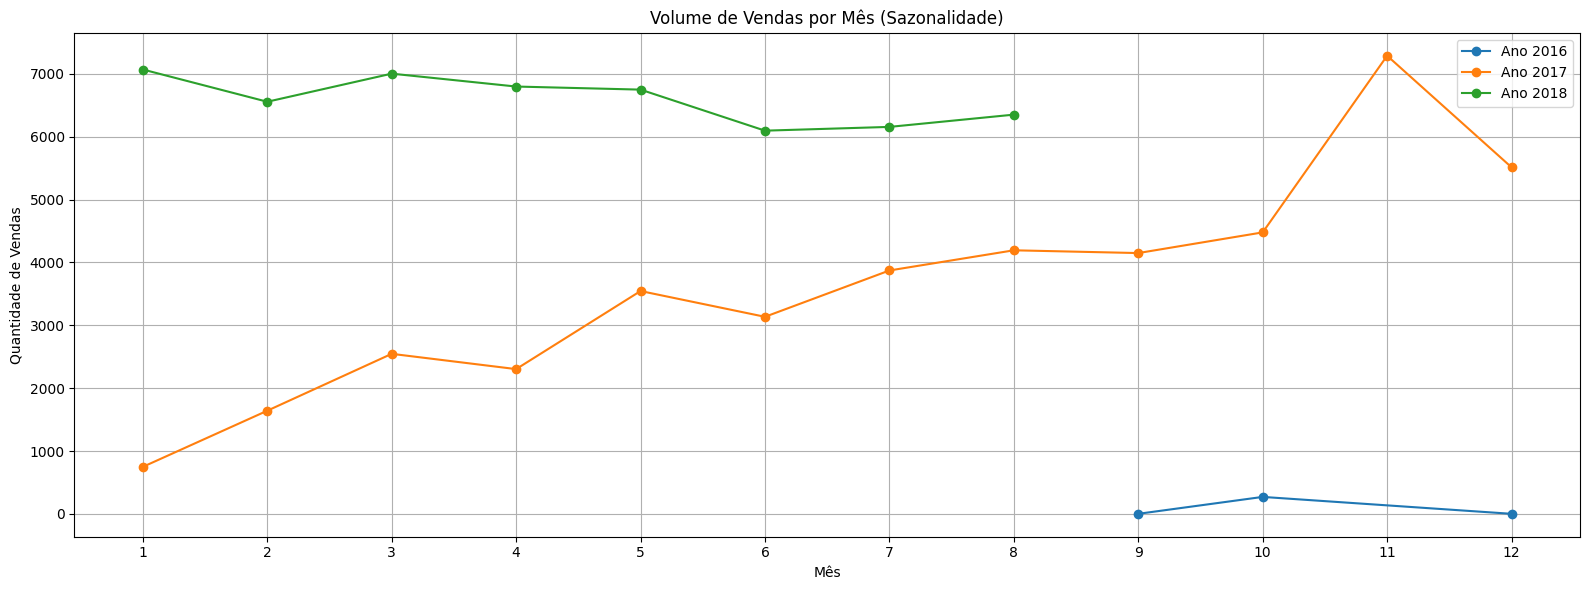

In [ ]:
# Agrupando vendas por ano e mês
vendas_mensais = venda_data.groupby(['ano', 'mes'])['order_id'].count().reset_index()
vendas_mensais.rename(columns={'order_id': 'qtd_vendas'}, inplace=True)

# Criar coluna "mês_ano" para facilitar o gráfico
vendas_mensais['mes_ano'] = vendas_mensais['mes'].astype(str).str.zfill(2) + '/' + vendas_mensais['ano'].astype(str)

# Ordenar pela data real
vendas_mensais['data_ordenada'] = pd.to_datetime(vendas_mensais['ano'].astype(str) + '-' + vendas_mensais['mes'].astype(str) + '-01')
vendas_mensais.sort_values('data_ordenada', inplace=True)

# Plotando gráfico de linha
plt.figure(figsize=(16, 6))
for ano in vendas_mensais['ano'].unique():
    dados_ano = vendas_mensais[vendas_mensais['ano'] == ano]
    plt.plot(dados_ano['mes'], dados_ano['qtd_vendas'], marker='o', label=f'Ano {ano}')

plt.title('Volume de Vendas por Mês (Sazonalidade)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Encontrar o mês com maior volume de vendas
mes_maior_venda = venda_mensal.loc[venda_mensal['quantidade_vendas'].idxmax()]
print(" Mês com MAIOR volume de vendas:")
display(mes_maior_venda)

# Encontrar o mês com menor volume de vendas
mes_menor_venda = venda_mensal.loc[venda_mensal['quantidade_vendas'].idxmin()]
print("\n Mês com MENOR volume de vendas:")
display(mes_menor_venda)

 Mês com MAIOR volume de vendas:


,13
ano,2017
mes,11
quantidade_vendas,7288



 Mês com MENOR volume de vendas:


,0
ano,2016
mes,9
quantidade_vendas,1


## 2. Análise de logística

Prazos de Entrega: Calcular o tempo médio de entrega e identificar os fatores que
influenciam atrasos nas entregas.

In [ ]:
# Mesclando os dados usando apenas colunas existentes
dados = pd.merge(pedidos, itens, on='order_id', how='left')
dados = pd.merge(dados, vendedores, on='seller_id', how='left')
dados = pd.merge(dados, produtos, on='product_id', how='left')
dados = pd.merge(dados, categorias, on='product_category_name', how='left')
dados = pd.merge(dados, avaliacoes, on='order_id', how='left')
dados = pd.merge(dados, geolocalizacao.drop_duplicates(subset='customer_zip_code_prefix'), on='customer_zip_code_prefix', how='left')
dados = pd.merge(dados, pagamentos, on='order_id', how='left')
dados = pd.merge(dados, clientes, on='customer_id', how='left')

# Convertendo colunas de data já existentes
dados['order_purchase_timestamp'] = pd.to_datetime(dados['order_purchase_timestamp'])
dados['order_delivered_customer_date'] = pd.to_datetime(dados['order_delivered_customer_date'])

# Cálculo de dias de entrega usando colunas já existentes
dados['dias_entrega'] = (dados['order_delivered_customer_date'] - dados['order_purchase_timestamp']).dt.days

# Filtrar atrasos maiores que 7 dias
atrasos = dados[dados['dias_entrega'] > 7]

# Atraso por vendedor
por_vendedor = atrasos['seller_id'].value_counts()
print("Entregas com atraso por responsável:")
print(por_vendedor)

# Atraso por estado do cliente
por_estado = atrasos['customer_state'].value_counts()
print("Entregas com atraso por estado:")
print(por_estado)


KeyError: 'order_id'

## 3. Análise de Satisfação do Cliente

Avaliações de Produtos: Analisar a distribuição das avaliações dos produtos e
identificar os produtos com as melhores e piores avaliações.



## 4. Análise Financeira


Análise de Lucratividade por Categoria: Calcular a lucratividade de diferentes
categorias de produtos, levando em conta o custo dos produtos e o preço de venda.

## 5. Análise de Marketing

Eficácia de Campanhas Promocionais: Avaliar o impacto de campanhas
promocionais e descontos no volume de vendas e na aquisição de novos clientes.

In [ ]:
import os

# List files in the directory
files = os.listdir('/content/drive/MyDrive/bd/')
for file in files:
    print(file)